인공 신경망은 뇌의 생물학적 뉴런 네트워크에서 영감을 받은 머신러닝 모델이다. 하지만 인공 신경망은 점점 뉴런에서 멀어지고 있다. 연구자들의 창의성이 생물학적 시스템에 국한되는 것보단 생물학적 비교를 버리는게 낫다는 뜻이다.

현재 인공 신경망은 이전의 인공 신경망 붐 때와는 달리 다음과같은 이점을 가지고 있다. 수많은 데이터, 하드웨어 발전, 훈련 알고리즘 향상, 일부 인공 신경망의 이론상의 한계가 실전에서 문제가 되지 않는다고 밝혀짐, 인공 신경망이 투자와 진보의 선순환에 들어간 것으로 보임.

## Setup

In [9]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## 뉴런을 사용한 논리 연산

매컬러와 피츠가 제안한 매우 단순한 신경망 모델(나중에 artificial neuron이 됨)  
하나 이상의 이진 입력과 하나의 이진 출력을 가짐. 입력이 일정 개수만큼 활성화되었을 때 출력을 내보냄. 생물학적 뉴런처럼 어떤 입력이 뉴런의 활성화를 억제할 수 있다고 가정하면 OR, AND 외의 더 복잡한 논리 명제를 계산할 수 있음.

## Perceptron

가장 간단한 인공 신경망 구조 중 하나. TLU(threshold logic unit) 혹은 LTU(linear threshold unit)라고 하는 조금 다른 형태의 인공 뉴런을 기반으로 함.  

### TLU

입력과 출력이 이진값이 아닌 숫자이고, 각 입력에는 가중치가 부여되어 있는 형태의 인공 뉴런.  
TLU는 입력의 가중치 합을 계싼한 뒤 계산된 합에 계단 함수를 적용하여 결과를 출력한다. 여기서 계단 함수로는 헤비사이드 계단 함수(unit step function)가 가장 널리 사용된다. 부호 함수(0 미만에서 -1인 step finction)를 대신 사용하기도 한다.  
하나의 THU는 선형 이진 분류 문제에 적용 가능하다. 이 경우 훈련이란 최적의 가중치를 찾는 것이다.

Perceptron은 한 층의 TLU로 구성된다. 각 TLU는 모든 입력에 연결되어 있다. 이렇게 한 층의 모든 뉴런이 이전 층의 모든 뉴런과 연결되어 있을 때 이를 완전 연결 층(fully connected layer) 또는 밀집 층(dense layer)이라고 부른다. 퍼셉트론의 입력층은 어떤 입력이든 그대로 통과시키는 입력 뉴런과 항상 1을 출력하는 편향 뉴런으로 이루어진다.

### Perceptron의 훈련 과정

서로 활성화되는 세포가 서로 연결되는 헤브의 규칙에서 조금 변형된 규칙을 사용한다. 퍼셉트론은 예측 결과로부터 오차를 계산해 이 오차를 줄이는 방향으로 가중치를 수정한다.  
각 뉴런의 결정 경계가 선형이므로 퍼셉트론은 (로지스틱 회귀 분류기처럼)복잡한 패턴을 학습하지 못한다. 하지만 훈련 샘플이 선형적으로 구분될 수만 있다면 알고리즘은 정답에 수렴하는 것이 증명되었다(로젠블라트, 퍼셉트론 수렴 이론)  

사이킷런이 제공하는 하나의 TLU 네트워크를 구현한 Perceptron 클래스로 붓꽃 데이터셋을 분류해보자.

In [10]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(int)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [4]:
y_pred

array([1])

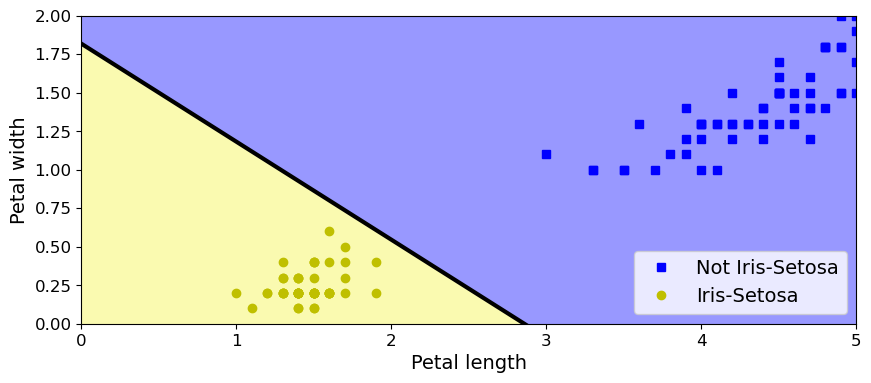

In [6]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

plt.show()

퍼셉트론은 여러 가지 심각한 약점을 가지고 있다. 퍼셉트론은 간단한 배타적 논리합(XOR) 분류 문제를 풀 수 없다. 퍼셉트론을 여러 개 쌓아올리면 일부 제약을 줄일 수 있다. 이런 인공 신경망을 다층 퍼셉트론(MLP)라 한다. 다층 퍼셉트론으로 XOR 분류 문제를 풀어보자.

In [11]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

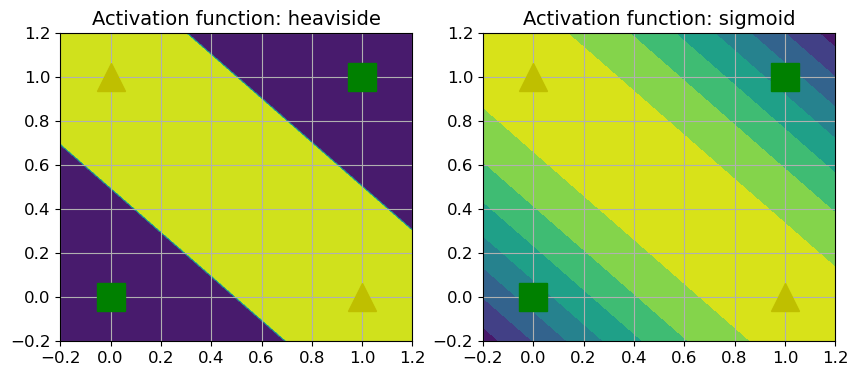

In [11]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

### 다층 퍼셉트론과 역전파(backpropagation)

다층 퍼셉트론은 입력층, 은닉층(하나), 출력층으로 구성된다. 입력층이 하위이고 출력층이 상위이다. 출력 층을 제외한 모든 뉴런은 다음 층과 완전히 연결되어 있다. 은닉층을 여러 개 쌓아 올린 인공 신경망을 심층 신경망(DNN)이라 한다.  
다층 퍼셉트론을 훈련하는 알고리즘으로 역전파가 있다. 이는 효율적인 기법으로 그레이디언트를 자동으로 계산하는(자동 미분) 경사 하강법이다.  
각 훈련 샘플로부터 정방향 계산으로 예측을 만든다. 이 과정에서 모든 계산 결과는 저장된다. 손실 함수를 사용해 출력으로부터 오차를 측정한다. 이후 각 출력 연결이 이 오차에 기여하는 정도를 역뱡향으로 가며 계산한다. 모든 연결 가중치에 대한 오차 그레이디언트가 측정되면 경사 하강법을 수행하여 연결 가중치를 수정한다.  

### 활성화 함수(activate function)

이 때 역전파 알고리즘이 잘 적용되도록 계단 함수를 다른 활성화 함수로 바꾼다. 계단 함수에는 수평선밖에 없어 계산할 그레이디언트가 없기 때문이다. 활성화 함수는 로지스틱(시그모이드), 하이퍼볼릭 탄젠트, ReLU 등이 있다. 좌측은 활성화 함수이고 우측은 그의 미분이다.

keras의 활성화 함수는 [https://keras.io/api/layers/activations/] 참고

In [12]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

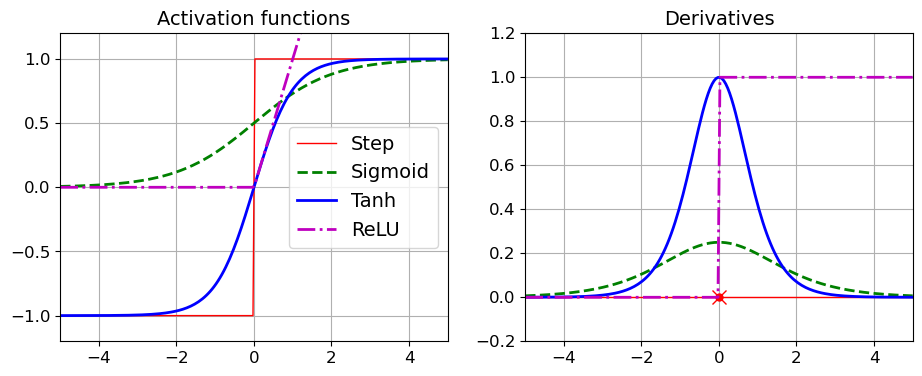

In [9]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

### 회귀를 위한 다층 퍼셉트론

다층 퍼셉트론은 회귀에 사용될 수 있다. 필요한 출력의 차원만큼 출력 뉴런이 필요하다. 일반적으로 회귀용 다층 퍼셉트론을 만들 땐 출력 뉴런에 활성화 함수를 사용하지 않고 어떤 범위의 값도 출력되도록 한다. 하지만 출력이 항상 양수여야 할 땐 ReLU의 변형인 softplus 함수(softplus(z) = log(1+exp(z)))를 사용할 수 있다. 그리고 어떤 범위 안의 값을 예측하고 싶다면 로지스틱 함수나 하이퍼볼릭 탄젠트 함수를 사용하여 레이블의 스케일을 적절한 범위로 조정할 수 있다.

훈련에서 사용하는 손실 함수는 전형적으로 평균 제곱 오차이다. 하지만 이상치가 많다면 평균 절댓값 오차나 이 둘을 조합한 후버 손실을 사용할 수 있다.

|하이퍼파라미터|일반적인 값|
|:---:|:---:|
|입력 뉴런 수|특성마다 하나|
|은닉층 수|일반적으로 1~5|
|은닉층의 뉴런 수|일반적으로 10~100|
|출력 뉴런 수|예측 차원마다 하나|
|은닉층의 활성화 함수|ReLU|
|출력층의 활성화 함수|없음. 출력이 양수라면 ReLU, softplus. 출력을 특정 범위로 제한할 땐 logistic, tanh|
|손실 함수|MSE, MAE(이상치가 있다면), Huber|

### 분류를 위한 다층 퍼셉트론

이진 분류: 다층 퍼셉트론은 분류 작업에도 사용할 수 있다. 이진 분류에서는 활성화 함수를 가진 하나의 출력 뉴런이 필요하다. 이 때 뉴런의 출력은 0에서 1 사이이다. 이 값을 양성 클래스에 대한 예측 확률로 해석할 수 있다. 음성 클래스 예측 확률은 1에서 이 값을 뺀 값이다.  
다중 레이블 이진 분류: 다층 퍼셉트론은 다중 레이블 이진 분류(여러 레이블, 각 레이블은 이진 클래스) 문제도 쉽게 처리할 수 있다. 레이블 수만큼 활성 함수를 가진 출력 뉴런이 필요하며 각 뉴런의 출력은 어떤 레이블의 양성 클래스의 확률을 나타낸다.  
다중 분류: 3개 이상의 클래스가 있다면(다중 분류) 클래스마다 하나의 출력 뉴런이 필요하다. 이 때 출력층에는 소프트맥스 활성화 합수를 사용해야 한다. 이 함수는 모든 예측 확률을 0과 1 사이로 만들고 더했을 때 1이 되도록 만든다.  

확률 분포를 예측해야 하므로 손실 함수는 일반적으로 크로스 엔트로피 손실을 선택하는 것이 좋다.

|하이퍼파라미터|이진 분류|다중 레이블 분류|다중 분류|
|:---:|:---:|:---:|:---:|
|입력층과 은닉층|회귀와 동일|회귀와 동일|회귀와 동일|
|출력 뉴런 수|1개|레이블마다 1개|클래스마다 1개|
|출력층의 활성화 함수|로지스틱 함수|로지스틱 함수|소프트맥스 함수|
|손실 함수|크로스 엔트로피|크로스 엔트로피|크로스 엔트로피|

## 케라스로 다층 퍼셉트론 구현하기(분류)

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.9.0'

In [3]:
keras.__version__

'2.9.0'

In [4]:
# 28x28 size의 fasion dataset load
# MNIST와 다르게 784 크기의 1D 배열이 아닌 28x28 크기의 2D 배열이다. 또한 픽셀 강도가 정수로 표현되어 있다.
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full.dtype

dtype('uint8')

In [7]:
# 입력 특성(0~255)을 0~1로 스케일링
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

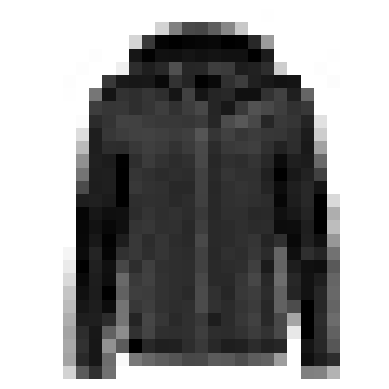

In [13]:
# 테스트 데이터의 첫 번째 데이터
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [16]:
# 클래스 라벨링
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

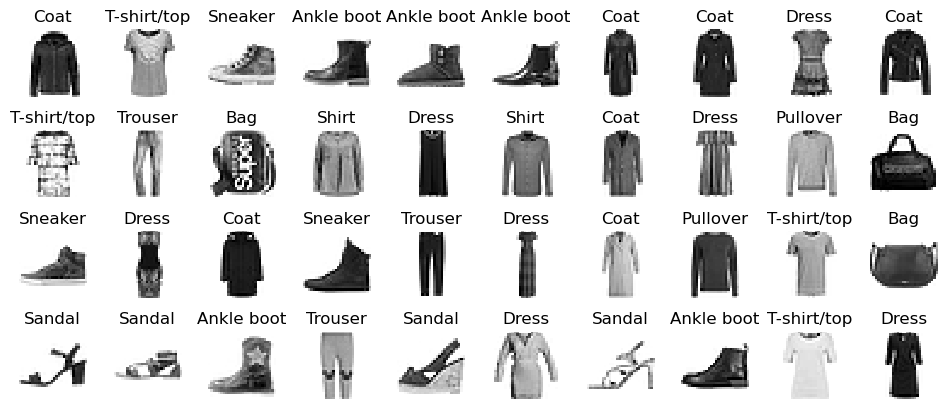

In [18]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### 모델 만들기(시퀀셜 API 사용)

In [19]:
model = keras.models.Sequential() # Sequential 모델 선언. 가장 간단한 케라스의 신경망 모델. 순서대로 연결된 층을 일렬로 쌓아서 구성.
model.add(keras.layers.Flatten(input_shape=[28, 28])) # 입력층. Flatten: 입력을 1D로 변환. 입력 형식을 정해줘야 함.
model.add(keras.layers.Dense(300, activation="relu")) # 300개의 뉴런을 가진 Dense 은닉층을 추가. ReLU 활성화 함수를 사용.
model.add(keras.layers.Dense(100, activation="relu")) # 100개의 뉴런을 가진 Dense 은닉층을 추가. ReLU 활성화 함수를 사용.
model.add(keras.layers.Dense(10, activation="softmax")) # 10개의 뉴런을 가진 Dense 출력층을 추가. 스프트맥스 활성화 함수 사용.

In [20]:
# 이렇게도 가능하다
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [24]:
model.layers # 층 리스트

In [23]:
model.summary() # 모든 층 정보

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [25]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [26]:
# 인덱스로 층에 접근 가능. 또는 이름으로 선택 가능.
hidden1 = model.layers[1] 
hidden1.name

'dense_3'

In [27]:
model.get_layer(hidden1.name) is hidden1

True

In [29]:
# 층의 파라미터에 접근: get_weights(), set_weights()
weights, biases = hidden1.get_weights()

In [34]:
weights
# 가중치가 모두 같으면 학습이 일어날 수 없다(대칭성을 깨뜨려야 한다). 따라서 최초 가중치는 무작위로 초기화되어 있다.

array([[ 0.02719212, -0.025045  , -0.03549641, ...,  0.06641094,
         0.03665537, -0.03893585],
       [-0.0189055 , -0.04133486, -0.03319786, ..., -0.07059013,
         0.06327008, -0.0518221 ],
       [-0.04646403,  0.07199733, -0.05124626, ...,  0.02120245,
        -0.02818862,  0.00141434],
       ...,
       [-0.01592549,  0.02565771, -0.02578053, ..., -0.01280487,
        -0.07320224,  0.06723498],
       [ 0.02197473, -0.07261457, -0.03039291, ...,  0.01418456,
        -0.04016334,  0.0543426 ],
       [ 0.03506474, -0.01397355,  0.03351243, ...,  0.03171876,
        -0.06845228,  0.03305764]], dtype=float32)

In [31]:
weights.shape

(784, 300)

In [32]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [33]:
biases.shape

(300,)

#### 모델 컴파일

모델을 만든 후 compile() 메서드로 손실 함수와 옵티마이저를 지정해야 함, 부가적으로 훈련과 평가 시에 계산할 지표를 추가로 지정할 수 있음.

In [35]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [36]:
# 모델 훈련하기
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.7326 - accuracy: 0.7564 - val_loss: 0.5249 - val_accuracy: 0.8214
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4897 - accuracy: 0.8292 - val_loss: 0.4374 - val_accuracy: 0.8536
Epoch 3/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4433 - accuracy: 0.8434 - val_loss: 0.5700 - val_accuracy: 0.7870
Epoch 4/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4158 - accuracy: 0.8548 - val_loss: 0.3943 - val_accuracy: 0.8650
Epoch 5/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3965 - accuracy: 0.8603 - val_loss: 0.3797 - val_accuracy: 0.8662
Epoch 6/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3778 - accuracy: 0.8658 - val_loss: 0.3751 - val_accuracy: 0.8712
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3653 - accuracy: 0.8708 - val_loss: 0.3669 - val_accuracy:

In [37]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [39]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [40]:
# hostory.history는 에포크가 끝날 때마다 훈련 세트와 (있다면) 검증 세트에 대한 손실과 측정한 지표를 담은 딕셔너리이다. 이를 사용해 학습 곡선을 그릴 수 있다.
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

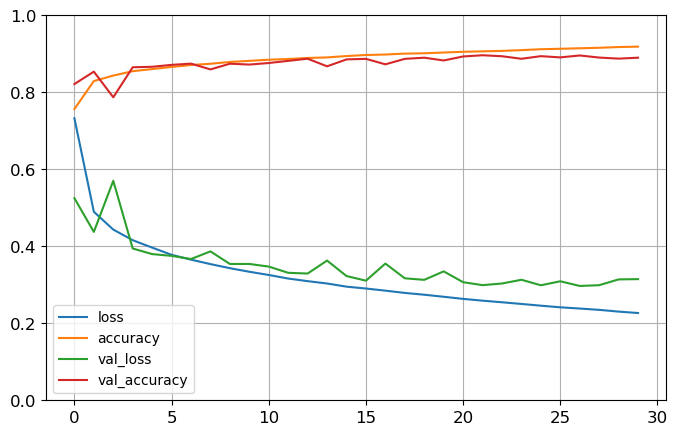

In [41]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

케라스에서는 fit 메서드를 다시 호출하면 중지되었던 곳에서부터 훈련을 이어갈 수 있다.  
모델 성능이 만족스럼지 않다면 처음으로 돌아가서 하이퍼파라미터를 튜닝할 수 있다. 이 때 가장 먼저 확인할 것은 학습률이다. 이외에 다른 옵티마이저를 테스트해보고 여전히 성능이 높지 않다면 층 개수, 층의 뉴런 수, 활성화 함수같은 모델 하이퍼파라미터를 튜닝할 수 있다. 배치 사이즈같은 다른 하이퍼파라미터도. 

#### 일반화 오차 추정

모델 정확도가 만족으러워 상용 환경에 배포하고자 한다면 그전에 테스트 세트로 모델을 평가하여 일반화 오차를 추정해야 한다.  
테스트 세트가 아닌 검증 세트에서 하이퍼파라미터를 튜닝했기 때문에 검증 세트보다 테스트 세트에서 성능이 조금 낮은 것이 일반적이다. 테스트 세트에서 하이퍼파라미터를 튜닝하지 말아야 한다. 일반화 오차가 매우 낙관적으로 추정되기 때문이다.

In [42]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3455 - accuracy: 0.8791


[0.3454614281654358, 0.8791000247001648]

### 모델을 사용해 예측 만들기

In [43]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 80ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.96],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [44]:
#y_pred = model.predict_classes(X_new) # deprecated
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 13ms/step


array([9, 2, 1], dtype=int64)

In [45]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [46]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

## 다층 퍼셉트론 만들기(회귀)

In [47]:
# california housing dataset
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [48]:
np.random.seed(42)
tf.random.set_seed(42)

In [49]:
# 회귀이므로 출력층엔 하나의 뉴런만 있으며 출력층 활성화 함수는 없다.
# 이 데이터셋에는 잡음이 많으므로 과대적합을 막기 위해 뉴런 수가 적은 은닉층 하나만 사용한다.
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 1.6419 - val_loss: 0.8560
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7047 - val_loss: 0.6531
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6345 - val_loss: 0.6099
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5977 - val_loss: 0.5658
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5706 - val_loss: 0.5355
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5472 - val_loss: 0.5173
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5288 - val_loss: 0.5081
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5130 - val_loss: 0.4799
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4992 - val_loss: 0.4690
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4875 - val_loss: 0.4656

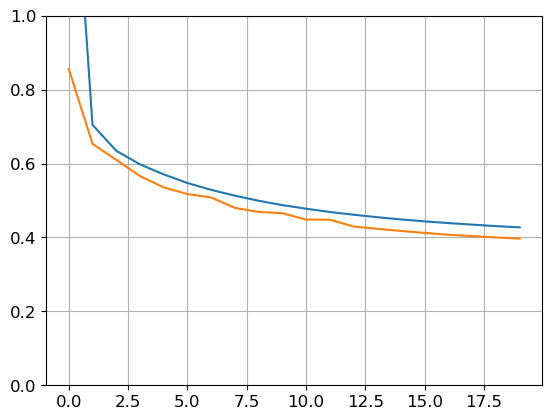

In [50]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [51]:
y_pred

array([[0.38856637],
       [1.6792021 ],
       [3.1022797 ]], dtype=float32)

## Functional API

Sequential 모델은 간단하고 사용하기 쉽다. 하지만 더 복잡한 네트워크 토폴로지를 갖는 신경망을 만들어야 할 때가 있다. 이 때는 함수형 API를 사용한다.

순차적이지 않은 신경망의 한 예는 와이드 & 딥 신경망이다. 입력의 일부 또는 전체가 출력층에 바로 연결되어 신경망이 복잡한 패턴(깊게 쌓은 층)과 간단한 규칙(짧은 경로)을 모두 학습할 수 있다. 이를 사용해 캘리포니아 주택 가격 회귀 문제를 해결해보자.

In [54]:
input_ = keras.layers.Input(shape=X_train.shape[1:]) # input 객체를 만든다. 모델의 입력을 정의한다. 한 모델은 여러 개의 입력을 가질 수 있다.
hidden1 = keras.layers.Dense(30, activation="relu")(input_) # 30개의 뉴런과 ReLU 활성화 함수를 가진 Dense 층을 만든다. 이 층은 input_과 함께 함수처럼 호출된다.
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1) # 두 번째 은닉 층을 만든다.
concat = keras.layers.concatenate([input_, hidden2]) # Concatenate 층(층 연결용)을 만들고 또다시 함수처럼 호출하여 입력층과 두 번째 은닉층을 연결한다.
output = keras.layers.Dense(1)(concat) # 활성화 함수가 없는 하나의 뉴런으로 이루어진 출력층을 만든다. concatenate 층과 함수로 연결한다.
model = keras.models.Model(inputs=[input_], outputs=[output]) # 마지막으로 사용할 입력과 출력(층의 이름)을 지정하여 케라스 Model을 만든다.

In [55]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_8 (Dense)                (None, 30)           270         ['input_3[0][0]']                
                                                                                                  
 dense_9 (Dense)                (None, 30)           930         ['dense_8[0][0]']                
                                                                                                  
 concatenate_2 (Concatenate)    (None, 38)           0           ['input_3[0][0]',                
                                                                  'dense_9[0][0]']          

In [56]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 1.9556 - val_loss: 9.0709
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.8789 - val_loss: 0.7934
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7204 - val_loss: 0.7917
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6638 - val_loss: 0.6160
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6181 - val_loss: 0.5734
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5800 - val_loss: 0.5743
Epoch 7/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5515 - val_loss: 0.5850
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5291 - val_loss: 0.5071
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5064 - val_loss: 0.4890
Epoch 10/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4888 - val_loss: 0.5309

만약 어떤 특성은 짧은 경로로, 어떤 특성은 긴 경로로 전하고 싶다면

In [57]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [58]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 2.2789 - val_loss: 2.3491
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.8530 - val_loss: 0.9370
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.7243 - val_loss: 0.6847
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6617 - val_loss: 0.6149
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6199 - val_loss: 0.5806
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5858 - val_loss: 0.5720
Epoch 7/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5581 - val_loss: 0.5726
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5334 - val_loss: 0.5507
Epoch 9/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5124 - val_loss: 0.5443
Epoch 10/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4960 - val_loss: 0.5452

만약 추가적인 출력이 필요하다면

In [59]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [60]:
# 각 출력에 손실 함수를 지정해줘야 하므로 손실 리스트를 전달해야 함. 각 출력의 손실에 서로 다른 가중치를 부여할 수도 있음.
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [61]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 3s 8ms/step - loss: 2.7225 - main_output_loss: 2.4357 - aux_output_loss: 5.3031 - val_loss: 2.0464 - val_main_output_loss: 1.6520 - val_aux_output_loss: 5.5962
Epoch 2/20
363/363 [==============================] - 2s 6ms/step - loss: 1.0533 - main_output_loss: 0.7839 - aux_output_loss: 3.4785 - val_loss: 0.9771 - val_main_output_loss: 0.7597 - val_aux_output_loss: 2.9339
Epoch 3/20
363/363 [==============================] - 2s 6ms/step - loss: 0.8169 - main_output_loss: 0.6496 - aux_output_loss: 2.3218 - val_loss: 0.7354 - val_main_output_loss: 0.6015 - val_aux_output_loss: 1.9409
Epoch 4/20
363/363 [==============================] - 2s 6ms/step - loss: 0.7282 - main_output_loss: 0.6097 - aux_output_loss: 1.7943 - val_loss: 0.6695 - val_main_output_loss: 0.5704 - val_aux_output_loss: 1.5613
Epoch 5/20
363/363 [==============================] - 2s 6ms/step - loss: 0.6819 - main_output_loss: 0.5862 - aux_output_loss: 1.5435 - val_loss

### 모델 테스트

In [62]:
# 개별 손실과 총 손실 반환
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 1s 4ms/step - loss: 0.4897 - main_output_loss: 0.4408 - aux_output_loss: 0.9295


In [63]:
# 각 출력에 대한 예측
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

1/1 [==============================] - 0s 75ms/step


## 서브클래싱 API로 동적 모델 만들기

Sequential API와 Functional API는 모두 선언적(사용할 층과 연결 방식을 먼저 정의함)이다. 이 방식의 장점은 모델 저장, 복사, 공유가 쉽고 구조를 출력하거나 분석하기 좋다는 것이다. 또한 프레임어크가 크기를 짐작하고 타입을 확인하여 에러를 일찍 발견할 수 있다. 전체 모델이 층으로 구성된 정적 그래프이므로 디버깅 하기도 쉽다.  
하지만 어떤 모델은 반복문을 포함하고 다양한 크기를 다루어야 하며, 조건문을 가지는 등 여러 가지 동적인 구조를 필요로 한다. 이런 경우 Subclassing API가 필요하다.(물론 앞서 말한 장점인 쉬운 분석과 모델 저장, 복사가 불가능해진다)  
Model 클래스를 상속한 다음 생성자 안에서 필요한 층을 만들고, call()메서드에 수행하려는 연산을 기술하여 만들 수 있다.

In [64]:
# 위의 함수형 API와 비슷하지만 Input 클래스의 객체를 만드는 대신 call() 메서드의 input 매개변수를 사용하도록 만든 모델
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [65]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 3s 7ms/step - loss: 2.3722 - output_1_loss: 2.2027 - output_2_loss: 3.8972 - val_loss: 1.6532 - val_output_1_loss: 1.2104 - val_output_2_loss: 5.6382
Epoch 2/10
363/363 [==============================] - 2s 6ms/step - loss: 0.9425 - output_1_loss: 0.7994 - output_2_loss: 2.2304 - val_loss: 1.5668 - val_output_1_loss: 1.0215 - val_output_2_loss: 6.4750
Epoch 3/10
363/363 [==============================] - 2s 6ms/step - loss: 0.7666 - output_1_loss: 0.6670 - output_2_loss: 1.6636 - val_loss: 1.4250 - val_output_1_loss: 0.8813 - val_output_2_loss: 6.3177
Epoch 4/10
363/363 [==============================] - 2s 6ms/step - loss: 0.6898 - output_1_loss: 0.6095 - output_2_loss: 1.4127 - val_loss: 1.1640 - val_output_1_loss: 0.6616 - val_output_2_loss: 5.6857
Epoch 5/10
363/363 [==============================] - 2s 6ms/step - loss: 0.6400 - output_1_loss: 0.5695 - output_2_loss: 1.2742 - val_loss: 1.0051 - val_output_1_loss: 0.5795 - val_ou

## 모델 저장과 복원

시퀀셜 API와 함수형 API를 사용한 경우(매우 쉬움)

In [66]:
# 모델 선언
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [67]:
# 컴파일
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
# 학습
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
# 평가
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 2s 4ms/step - loss: 2.1781 - val_loss: 1.7808
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.8040 - val_loss: 0.8024
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.7037 - val_loss: 0.8151
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6577 - val_loss: 0.6666
Epoch 5/10
363/363 [==============================] - 1s 4ms/step - loss: 0.6218 - val_loss: 0.6082
Epoch 6/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5898 - val_loss: 0.5610
Epoch 7/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5632 - val_loss: 0.5389
Epoch 8/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5401 - val_loss: 0.5031
Epoch 9/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5199 - val_loss: 0.4796
Epoch 10/10
162/162 [==============================] - 0s 2ms/step - loss: 0.4806


In [68]:
# 저장!
model.save("my_keras_model.h5")

In [69]:
# 불러오기!
model = keras.models.load_model("my_keras_model.h5")

In [70]:
# 불러온 모델로 예측
model.predict(X_new)

1/1 [==============================] - 0s 59ms/step


array([[0.859408 ],
       [1.4941758],
       [2.823781 ]], dtype=float32)

In [71]:
model.save_weights("my_keras_weights.ckpt")

In [72]:
model.load_weights("my_keras_weights.ckpt")

### 콜백 사용하기

훈련이 지속되는 동안 저장하고 싶다면 훈련 도중 일정 간격으로 체크포인트를 저장해야 한다. 이를 위해서는 콜백을 사용하면 된다.  

In [73]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [74]:
# 모델 선언
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [75]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
# callback 지정
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
# callback 사용하여 훈련
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 2s 4ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 1s 4ms/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/10
162/162 [==============================] - 0s 2ms/step - loss: 0.4382


In [77]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
# 조기종료 기능과 최고성능 모델만 저장 기능 사용
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 2s 4ms/step - loss: 0.3975 - val_loss: 0.3718
Epoch 2/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3948 - val_loss: 0.3703
Epoch 3/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3922 - val_loss: 0.3671
Epoch 4/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3896 - val_loss: 0.3652
Epoch 5/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3873 - val_loss: 0.3627
Epoch 6/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3850 - val_loss: 0.3605
Epoch 7/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3828 - val_loss: 0.3582
Epoch 8/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3808 - val_loss: 0.3574
Epoch 9/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3787 - val_loss: 0.3563
Epoch 10/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3766 - val_lo

더 많은 제어를 위해 사용자 정의 콜백을 만들 수 있다.  
다음은 훈련동안 검증 손실과 훈련 손실의 비율(과대적함 탐지용)을 출력하는 간단한 사용자 정의 콜백이다.

In [78]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [79]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

360/363 [============================>.] - ETA: 0s - loss: 0.3654
val/train: 1.01
363/363 [==============================] - 1s 4ms/step - loss: 0.3658 - val_loss: 0.3679


## 텐서보드

인터렉티브 시각화 도구이다. 훈련하는 동안 학습 곡선을 그리거나 여러 실행 간의 학습 곡선을 비교하고 계산 그래프 시각화와 훈련 통계 분석을 수행할 수 있다. 또한 모델이 생성한 이미지를 확인하거나 3D에 투영된 복잡한 다차원 데이터를 시각화하고 자동으로 클러스터링을 해주는 등 많은 기능을 제공한다.  
텐서보드를 사용하려면 프로그램을 수정하여 이벤트 파일(event file)이라는 특별한 이진 로그 파일에 시각화하려는 데이터를 출력해야 한다. 각각의 이진 데이터 레코드를 서머리(summaty)라 한다. 텐서보드 서버는 로그 디렉터리를 모니터링하며 그래프를 업데이트한다. 일반적으로 텐서보드 서버가 루트 로그 디렉터리를 가리키고 프로그램은 실행할 때마다 다른 서브디렉터리에 이벤트를 기록한다. 이로써 간단하게 하나의 텐서보드 서버가 여러 번 실행한 프로그램의 결과를 시각화하고 비교할 수 있다.

In [80]:
import os

In [81]:
# 루트 로그 디렉토리 정의
root_logdir = os.path.join(os.curdir, "my_logs")

In [82]:
# 날짜와 시간을 사용해 실행할 때마다 다른 서브디렉터리 경로를 생성하는 함수
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2024_05_03-14_53_22'

In [83]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [84]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [85]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 2s 4ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/30
363/363 [==============================] - 1s 3ms/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/30
363/363 [==============================] - 1s 3ms/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/30
363/363 [==============================] - 1s 3ms/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/30
363/363 [==============================] - 1s 4ms/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/30
363/363 [==============================] - 1s 3ms/step - loss: 0.4474 - val_loss: 0.4379

텐서보드 서버를 시작하려면 루트 디렉터리에서 다음을 실행한다.

In [87]:
$ tensorboard --logdir=./my_logs --port=6006

ERROR: unknown command "tensorboard"



서버가 실행되면 웹 브라우저를 열고 접속한후 주피터에서 텐서보드를 사용하면 된다.

## 신경망 하이퍼파라미터 튜닝

GridSearchCV, RandomizedSearchCV를 사용하기 위해선 케라스 모델을 사이킷런 추정기처럼 보이도록 바꾸어야 한다. 다음은 일련의 하이퍼파라미터로 케라스 모델을 만들고 컴파일하는 함수이다.

In [88]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [89]:
# 주어진 입력 크기와 은닉층 개수, 뉴런 개수로 단변량 회귀를 위한 Sequential 모델을 만드는 함수
# 지정된 학습률을 사용하는 SGD 옵티마이저로 모델을 컴파일한다.
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [90]:
# 모델 선언
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

C:\Users\82102\AppData\Local\Temp\ipykernel_32168\118524284.py:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [91]:
# 모델 학습
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 2s 4ms/step - loss: 1.0896 - val_loss: 20.7721
Epoch 2/100
363/363 [==============================] - 1s 3ms/step - loss: 0.7606 - val_loss: 5.0266
Epoch 3/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5456 - val_loss: 0.5490
Epoch 4/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4732 - val_loss: 0.4529
Epoch 5/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4503 - val_loss: 0.4188
Epoch 6/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4338 - val_loss: 0.4129
Epoch 7/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4241 - val_loss: 0.4004
Epoch 8/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4168 - val_loss: 0.3944
Epoch 9/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4108 - val_loss: 0.3961
Epoch 10/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4060 - val_l

In [92]:
# 하이퍼 파라미터가 많으므로 RandomizedSearchCv로 튜닝
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100)               .tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2)      .rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/100
242/242 [==============================] - 1s 4ms/step - loss: 0.7861 - val_loss: 0.4686
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4791 - val_loss: 0.4998
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4595 - val_loss: 0.4157
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4497 - val_loss: 0.4080
Epoch 5/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4455 - val_loss: 0.5519
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4427 - val_loss: 0.4784
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4468 - val_loss: 0.5038
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4394 - val_loss: 0.6504
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4631 - val_loss: 0.4199
Epoch 10/100
242/242 [========

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x000001A9CCDC3370>,
                   param_distributions={'learning_rate': [0.0016834549246003507,
                                                          0.023908364455931787,
                                                          0.008731907739399207,
                                                          0.004725396149933918,
                                                          0.0006154014789262349,
                                                          0.0006153331256530192,
                                                          0.00039200217714159834,
                                                          0.016198453229362288,
                                                          0.004779156784872304,
                                                          0.00782107427...
                                                          0.0050214257366256385,
                                                          0.0005703073595961107,
                                                          0.001151888789941251,
                                                          0.0016212311563941985,
                                                          0.0024505367684280496,
                                                          0.011155092541719619,
                                                          0.0007524347058135697,
                                                          0.003203244812844405,
                                                          0.004591455636549436,
                                                          0.0003715541189658279, ...],
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...]},
                   verbose=2)

In [93]:
# best parameters
rnd_search_cv.best_params_

{'n_neurons': 80, 'n_hidden': 3, 'learning_rate': 0.0059640580092043885}

In [94]:
# best score(사이킷런은 손실이 아니라 점수를 계산하기 때문에 출력 점수는 음수의 MSE이다.)
rnd_search_cv.best_score_

-0.31733325123786926

In [95]:
rnd_search_cv.best_estimator_

In [96]:
rnd_search_cv.score(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.2860


-0.2860483229160309

In [97]:
model = rnd_search_cv.best_estimator_.model
model

In [98]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.2860


0.2860483229160309

### 하이퍼파라미터 공간 탐색 기법 라이브러리

__Hyperopt__ : 모든 종류의 복잡한 탐색 공간데 대해 최적화를 수행할 수 있음.  
__Hyperas, kopt, Talos__ : 케라스 모델을 위한 하이퍼파라미터 최적화 라이브러리(Hyperas, kopt는 hyperopt 기반이다)  
__케라스 튜너__ : 사용하기 쉬운 케라스 하이퍼파라미터 최적화 라이브러리. 구글이 만들었고 시각화와 분석을 포함함.  
__Scikit-Optimize(skopt)__ : 범용 최적화 라이브러리이다. BayesSearchCv 클래스는 GridSearchCV와 비슷한 인터페이스를 사용하여 베이즈 최적화를 수행한다.  
__Spearmint__ : 베이즈 최적화 라이브러리.  
__Hyperband__ : 빠른 하이퍼파라미터 튜닝 라이브러리.  
__Sklearn_Deep__ : GridSearchCV와 비슷한 인터페이스를 가진 진화 알고리즘 기반의 하이퍼파라미터 최적화 라이브러리.

### 은닉층 개수

이론적으로 은닉층이 하나인 다층 퍼셉트론이라도 뉴런 개수가 충분하다면 아주 복잡한 함수도 모델링 가능하다. 하지만 심층 신경망이 얕은 신경망보다 파아미터 효율성이 훨씬 좋다. 때문에 복잡한 문제에서는 같은 뉴런 수라도 층이 많으면 일반적으로 성능이 더 좋다. 훈련 세트에 과대적합이 생길 때까지 층수를 늘릴 수 있다.

### 은닉층의 뉴런 개수

은닉층의 구성 방식은 일반적으로 각 층의 뉴런을 상위로 갈수록 점점 줄여 깔때기처럼 구성한다. 저수준의 많은 특성이 고수준의 적은 특성으로 합쳐질 수 있기 때문이다. 그런데 대부분의 경우 모든 은닉층에 같은 크기를 사용하면 점점 줄어들 때와 동일하거나 더 나은 성능을 낸다. 데이터셋에 따라 다르지만 다른 은닉층보다 첫 번째 은닉층을 크게 하는 것이 도움이 된다.  
훈련 세트에 과대적합이 생길 때까지 뉴런 수를 늘릴 수 있지만, 실전에서는 충분한 층과 뉴런을 가진 모델을 선택하고 과대적합되지 않도록 조기 종료나 규제 기법을 사용하는 것이 간단하고 효과적이다.

### 학습율, 배치 크기, 그 외

__학습률__ : 매우 중요한 하이퍼파라미터이다. 일반적으로 최적의 학습률은 최대 학습률의 절반 정도이다. 좋은 학습률은 찾는 방법은 매우 낮은 학습률부터 점진적으로 매우 큰 학습률까지 수백 번 반복하여 모델을 훈련하는 것이다. 반복마다 일정한 값을 학습률에 곱한다. 학습률에 대한 손실을 그래프로 그려 극점을 찾을 수 있다.  
__배치 크기__ : 배치 크기가 클수록 한번에 많은 샘플을 처리할 수 있다. 큰 배치를 사용하면 훈련 초기에 종종 불안정하게 훈련되어 작은 배치 크기로 훈련된 모델만큼 일반화 성능을 내지 못할 수 있다.  
__활성화 함수__ : 일반적으로 ReLU 함수가 모든 은닉층에 좋은 기본값이다. 출력층의 활성화 함수는 수행하는 작업에 따라 달라진다.  
__반복 횟수__ : 대부분의 경우 조기 종료를 사용하기 때문에 훈련 반복 횟수 튜닝은 필요가 없다.